In [1]:
import pandas as pd
import nltk 

In [1]:
nltk.download('words')
WORDS = set(nltk.corpus.words.words())
WORDS = [w.lower() for w in WORDS]

[nltk_data] Downloading package words to /home/manpreet/nltk_data...
[nltk_data]   Package words is already up-to-date!


### Function to remove Non - English words using nltk

In [2]:
def remove_non_english_words(text,words=WORDS):
    '''
    converts a text into lower case and checks if the words are in english,
    else removes them.
    '''
    text = str(text).lower()
    return " ".join([w for w in text.split() if w in words])


remove_non_english_words('roTi iS nOt an EnGliSh woRd')

'is not an english word'

### Read the raw data and drop duplicate entries

In [3]:
raw_df = pd.read_excel('../data/raw_data.xlsx')
raw_df = raw_df[['Department','Rating']]
raw_df.columns = ['Department','Complaint']
df = raw_df.drop_duplicates()
df.head()

,Department,Complaint
0,Encroachment,Topkapi in seasons mall is playing music on lo...
1,Drainage,Dranage over flow freqently
2,Electrical,Street light is not working
3,Traffic-Planning,Please repair road at kpndwa flyover kondhwa pune
4,Electrical,Please make street light functional at Divya n...


### Using Groupby to get a rough idea about the raw data

In [4]:
grouped_df = df.groupby('Department').count()
grouped_df.sort_values('Complaint',ascending=False)

,Complaint
Department,
Garbage (SWM),4402
Electrical,3902
Road Project(H.O),3144
Water Supply,3093
Building Permission,2851
Road,2752
Drainage,2208
Garden,1823
Property Tax,1546


In [5]:
df = df.set_index('Department')
df.to_excel('../data/temp.xlsx')

In [7]:
cleaned_df = pd.DataFrame()

for _,row in df.iterrows():
    label = row.name
    text = remove_non_english_words(row.Complaint)
    
    if len(text) and label:
        cleaned_df = cleaned_df.append([[text,label]])
    
    if cleaned_df.shape[0] % 1000 == 0:
        print(cleaned_df.shape[0])

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000


In [8]:
cleaned_df.columns = ['text', 'label']
cleaned_df = cleaned_df.set_index('label')
cleaned_df.to_excel('../data/cleaned_df.xlsx')

In [9]:
grouped_df = cleaned_df.groupby(cleaned_df.index).count()
grouped_df.sort_values('text',ascending=False)

,text
label,
Garbage (SWM),3952
Electrical,3544
Road Project(H.O),2924
Water Supply,2864
Road,2425
Building Permission,2053
Drainage,1923
Garden,1595
Property Tax,1488


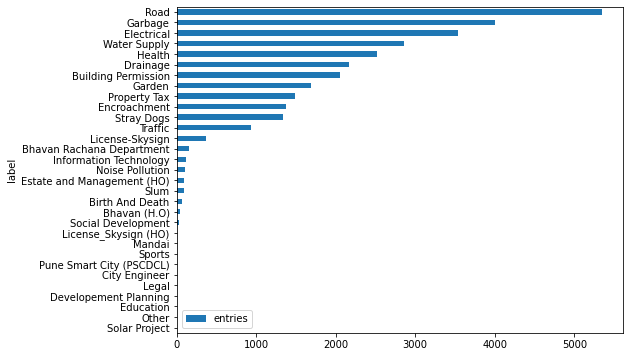

In [45]:
df = pd.read_excel('../data/cleaned_df.xlsx')

df = df.set_index('label')

mapper = {
    'Drainage Project(H.O)': 'Drainage',
    'Health (H.O)' : 'Health',
    'Health Kitak' : 'Health',
    'Garden - Civil' : 'Garden',
    'Garden - Electrical' : 'Garden',
    'Encroachment (HO)' : 'Encroachment',
    'Garbage (SWM)' : 'Garbage', 
    'SWM (HO)' : 'Garbage',
    'Road Project(H.O)' : 'Road',
    'Traffic-signal(Electrical)' : 'Traffic',
    'Traffic-Planning' : 'Traffic',   
}

df = df.rename(mapper=mapper)
grouped_df = df.groupby(df.index).count()
grouped_df.columns = ['entries']
grouped_df = grouped_df.sort_values('entries',ascending=True)

grouped_df.plot(kind='barh',figsize=(8,6))

In [60]:
depts = [grouped_df.loc[i].name for i in grouped_df.index if grouped_df.loc[i].entries > 900] 
df = df[df.index.isin(depts)]
df.shape


(29333, 1)

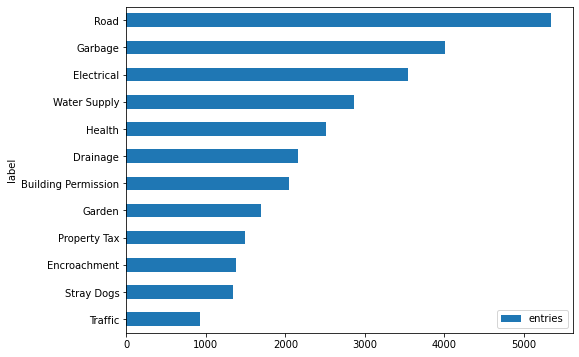

In [61]:
grouped_df = df.groupby(df.index).count()
grouped_df.columns = ['entries']
grouped_df = grouped_df.sort_values('entries',ascending=True)

grouped_df.plot(kind='barh',figsize=(8,6))

In [64]:
df.to_csv('../data/training.csv')